# Part 1: Understanding the Data

1. What is the objective of this data collection process?

The objective of the project was to identify 6 particular human activities for daily living (ADL) such as walking,sitting etc. For that, data was collected from human samples by utilizing built in sensor information of smartphone's accelerometer and gyroscope. The smaprphones was waist-mounted to human samples when they performed different activities.  

2. What human activity types does this dataset have? How many subjects/people have performed these activities?

Six human activity is recorded in this dataset which are Walking,Walking Upstairs, Walking Downstairs, Sitting, Standing, and Laying. In total 30 volunteers have performed these activities as human samples whose age was between 19 to 48 years.  

3. How many instances are available in the training and test sets? How many features are used to represent each instance? Summarize the type of features extracted in 2-3 sentences

The total data was randomly split between training and testing data where 70% training data contains 7352 instance and 30% testing data contains 2947 instances. 

In total 561 features were use to represent each instance.These features worked as the predictors of the label.

By capturing 3-axial raw signals from accelerometer and gyroscope, these features fundementally contain 3 axial body acceleration and gravity accelaration data of the subjects along with 3 axial angular velocity data from gyroscope for different positions of the subjects. These body  acceleration and angular velocity were derived in time to capture the respective jerk signals such as (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Here, f refers to frequency domain, t refers to time domain, g refers to gravity and all the feature data were normalized within -1 to 1 range.        


4. Describe briefly what machine learning model is used in this paper for activity recognition and how is it trained. How much is the maximum accuracy achieved?

Support Vector Machine classifier model with gausian kernal was used by the researchers in this human activity recognition task. 70% of the data was used for training set and 30% was left for testing, this was a random partition. In training 10 fold cross validation was applied. Overall, it achieved a maximum 96% accuracy when model was tested on training set. From the Table-4 confuion matrix of the paper it is revealed that the model achieved 100% recall in classifying "Laying down" position where it did not perform very well for classifying "Sitting" position as it shows 88% recall.   


# importing and exploring the data

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [6]:
#importing training data and training label, 
X_train= pd.read_csv('E:/ALL DEAKIN/T2_JUL_NOV_2019/MACHINE LEARNING_SIT720/Assignment3/AssessmentTask4/train/X_train.txt',delim_whitespace= True,header=None).values
y_train= pd.read_csv('E:/ALL DEAKIN/T2_JUL_NOV_2019/MACHINE LEARNING_SIT720/Assignment3/AssessmentTask4/train/y_train.txt',delim_whitespace= True,header=None).values

#Checking the type and shape of those
print("X_train is of type: {}".format(type(X_train)))
print("y_train is of type: {}".format(type(y_train)))

print("X_train is of shape: {}".format(X_train.shape))
print("y_train is of shape: {}".format(y_train.shape))

#printing the unique labels in y_train
print ("unique labels of y_train: {}".format(np.unique(y_train)))

X_train is of type: <class 'numpy.ndarray'>
y_train is of type: <class 'numpy.ndarray'>
X_train is of shape: (7352, 561)
y_train is of shape: (7352, 1)
unique labels of y_train: [1 2 3 4 5 6]


In [3]:
#importing test data and test label, 
X_test= pd.read_csv('E:/ALL DEAKIN/T2_JUL_NOV_2019/MACHINE LEARNING_SIT720/Assignment3/AssessmentTask4/test/X_test.txt',delim_whitespace= True,header=None).values
y_test= pd.read_csv('E:/ALL DEAKIN/T2_JUL_NOV_2019/MACHINE LEARNING_SIT720/Assignment3/AssessmentTask4/test/y_test.txt',delim_whitespace= True,header=None).values

#Checking the type and shape of those
print("X_test is of type: {}".format(type(X_test)))
print("y_test is of type: {}".format(type(y_test)))

print("X_test is of shape: {}".format(X_test.shape))
print("y_test is of shape: {}".format(y_test.shape))

#printing the unique labels in y_test
print ("unique labels of y_test: {}".format(np.unique(y_test))) 

X_test is of type: <class 'numpy.ndarray'>
y_test is of type: <class 'numpy.ndarray'>
X_test is of shape: (2947, 561)
y_test is of shape: (2947, 1)
unique labels of y_test: [1 2 3 4 5 6]


In [9]:
#importing label and features list for both set of data 
Label = pd.read_csv('E:/ALL DEAKIN/T2_JUL_NOV_2019/MACHINE LEARNING_SIT720/Assignment3/AssessmentTask4/activity_labels.txt',delimiter=' ',header=None)
Features=pd.read_csv('E:/ALL DEAKIN/T2_JUL_NOV_2019/MACHINE LEARNING_SIT720/Assignment3/AssessmentTask4/features.txt',delimiter=' ',header=None)

#Output of label providing list of 6 labels discussed before with their respective unique coding 1-6 as seen in y_train and y_test
#Output of Features showing 561 features as which matches with the columns of the training and test data
print("Label of the data:{}".format(Label))
print("Features of the data:{}".format(Features))

Label of the data:   0                   1
0  1             WALKING
1  2    WALKING_UPSTAIRS
2  3  WALKING_DOWNSTAIRS
3  4             SITTING
4  5            STANDING
5  6              LAYING
Features of the data:       0                                     1
0      1                     tBodyAcc-mean()-X
1      2                     tBodyAcc-mean()-Y
2      3                     tBodyAcc-mean()-Z
3      4                      tBodyAcc-std()-X
4      5                      tBodyAcc-std()-Y
5      6                      tBodyAcc-std()-Z
6      7                      tBodyAcc-mad()-X
7      8                      tBodyAcc-mad()-Y
8      9                      tBodyAcc-mad()-Z
9     10                      tBodyAcc-max()-X
10    11                      tBodyAcc-max()-Y
11    12                      tBodyAcc-max()-Z
12    13                      tBodyAcc-min()-X
13    14                      tBodyAcc-min()-Y
14    15                      tBodyAcc-min()-Z
15    16                        tB

In [18]:
#understanding any imbalanced case of classes in training set.Output reveals it is fairly balanced.  
print("Walking:{}".format(np.count_nonzero(y_train == 1)))
print("Walking upstairs:{}".format(np.count_nonzero(y_train == 2)))
print("Walking downstairs:{}".format(np.count_nonzero(y_train == 3)))
print("Sitting:{}".format(np.count_nonzero(y_train == 4)))
print("Standing:{}".format(np.count_nonzero(y_train == 5)))
print("Laying:{}".format(np.count_nonzero(y_train == 6)))


Walking:1226
Walking upstairs:1073
Walking downstairs:986
Sitting:1286
Standing:1374
Laying:1407


In [19]:
#exploring any imbalanced case of classes in test set.Output reveals it is fairly balanced.  
print("Walking:{}".format(np.count_nonzero(y_test == 1)))
print("Walking upstairs:{}".format(np.count_nonzero(y_test == 2)))
print("Walking downstairs:{}".format(np.count_nonzero(y_test == 3)))
print("Sitting:{}".format(np.count_nonzero(y_test == 4)))
print("Standing:{}".format(np.count_nonzero(y_test == 5)))
print("Laying:{}".format(np.count_nonzero(y_test == 6)))

Walking:496
Walking upstairs:471
Walking downstairs:420
Sitting:491
Standing:532
Laying:537


# Part 2: K NN Classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
#To know the performance measurement to be used based on Student ID
#Based on the output, using "accuray" as Performance evaluation
fID=218631099%2
print(fID)

1


In [18]:
#Letting K to take value from 1 to 50
k_value = list(range(1,50))

Acc_cv = []

# performing 10-fold cross validation
for k in range(1,50):
    kNN_model = KNeighborsClassifier(n_neighbors=k)
    Acc_score= cross_val_score(kNN_model, X_train, y_train.ravel(), cv=10, scoring='accuracy', n_jobs=-1)
    Acc_cv.append(Acc_score.mean())

Text(0, 0.5, 'Accuracy')

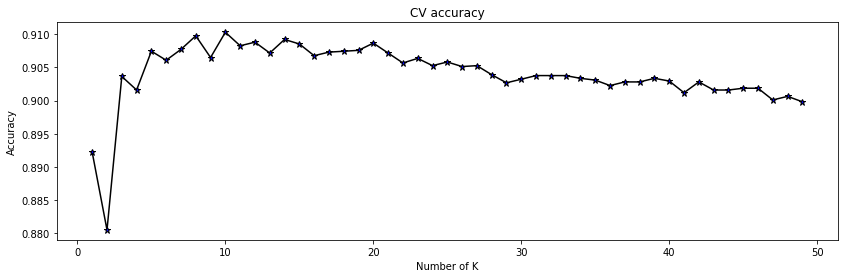

In [31]:
#plotting the cross validation accuracy with respect to K
plt.figure(figsize=(14,4))
plt.plot(k_value,Acc_cv, color='black',linestyle='solid',marker='*',markerfacecolor='Blue',markersize=7)
plt.title('CV accuracy')
plt.xlabel('Number of K')  
plt.ylabel('Accuracy')

In [32]:
#Choosing the best K value based on Accuracy
Highest_knn = np.argmax(Acc_cv)
Best_k = k_value[Highest_knn]
    
print("Best K value:{}".format(Best_k))

Best K value:10


So from above plot and calculation we can see best K value is 10 that giving about 91% accuracy. 

In [34]:
#Using the best value of K (10) evaluating the model on test set. 

Test_knn = KNeighborsClassifier(n_neighbors=10)
Test_knn.fit(X_train,y_train.ravel())
predict_knn= Test_knn.predict(X_test)
Test_knn_acc= accuracy_score(y_test,predict_knn)
Test_knn_CR= classification_report(y_test,predict_knn)
Test_knn_CM=confusion_matrix(y_test,predict_knn)
print("Confusion Matrix of KNN model:\n{}".format(Test_knn_CM))
print("Classification Report of KNN model:\n{}".format(Test_knn_CR))
print("Accuracy Score of KNN model:\n{}".format(Test_knn_acc))

Confusion Matrix of KNN model:
[[486   0  10   0   0   0]
 [ 36 431   4   0   0   0]
 [ 51  41 328   0   0   0]
 [  0   4   0 409  78   0]
 [  0   0   0  47 485   0]
 [  0   0   0   2   2 533]]
Classification Report of KNN model:
              precision    recall  f1-score   support

           1       0.85      0.98      0.91       496
           2       0.91      0.92      0.91       471
           3       0.96      0.78      0.86       420
           4       0.89      0.83      0.86       491
           5       0.86      0.91      0.88       532
           6       1.00      0.99      1.00       537

   micro avg       0.91      0.91      0.91      2947
   macro avg       0.91      0.90      0.90      2947
weighted avg       0.91      0.91      0.91      2947

Accuracy Score of KNN model:
0.9066847641669494


Confusion Matrix indicating least number of missclassification cases for action "LAYING" where maximum instances of missclassification happened for action "WALKING DOWNSTAIRS". 
Wighted Avearge F1 score is high as 91% where within the classes, F1 score for "WALKING DOWNSTAIRS" & "SITTING" is lowest compared to the rest. 
Finally, the overall Accuracy score for KNN model with k=10 is 90.66%

# Part 3: Multiclass Logistic Regression with Elastic Net

In [35]:
##To know the performance measurement to be used for this part based on Student ID
#Based on the output, using "F1 score" as Performance evaluation
fID=218631099%2
print(fID)

1


In [11]:
import warnings
warnings.filterwarnings(('ignore'))
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDClassifier 
from sklearn.datasets import make_regression

#building elastic net regularized logistic regression classifier with 10 fold CV

Enet_f1=[]

Alpha=[1e-4,3e-4,1e-3,3e-3,1e-2,3e-2]

l1=[0,0.15,0.5,0.7,1]

Enet_f1_Average=[]
Enet_L1=[]
Enet_Alpha=[]


for i in l1:
    for l in Alpha:
        Enet_Model = SGDClassifier(loss='log', penalty='elasticnet', alpha=l, l1_ratio=i)
        f1_Enet = cross_val_score(estimator=Enet_Model, X=X_train, y=y_train.ravel(),cv=10,scoring='f1_weighted',n_jobs=-1)
        Enet_f1_Average=f1_Enet.mean()
        Enet_f1.append(Enet_f1_Average)
        Enet_L1 = np.append(Enet_L1,i)
        Enet_Alpha= np.append(Enet_Alpha,l)

In [23]:
#best value of alpha and l1

max_f1=np.argmax(Enet_f1)

Best_alpha= Enet_Alpha[max_f1]
Best_lambda = Enet_L1[max_f1]

print("Best Alpha Value: {}".format(Best_alpha))
print("Best Lambda Value: {}".format(Best_lambda))

Average_f1= ((np.array(Enet_f1)).mean())
print("Average F1:{}".format(Average_f1))


Best Alpha Value: 0.001
Best Lambda Value: 0.5
Average F1:0.9072107479105195


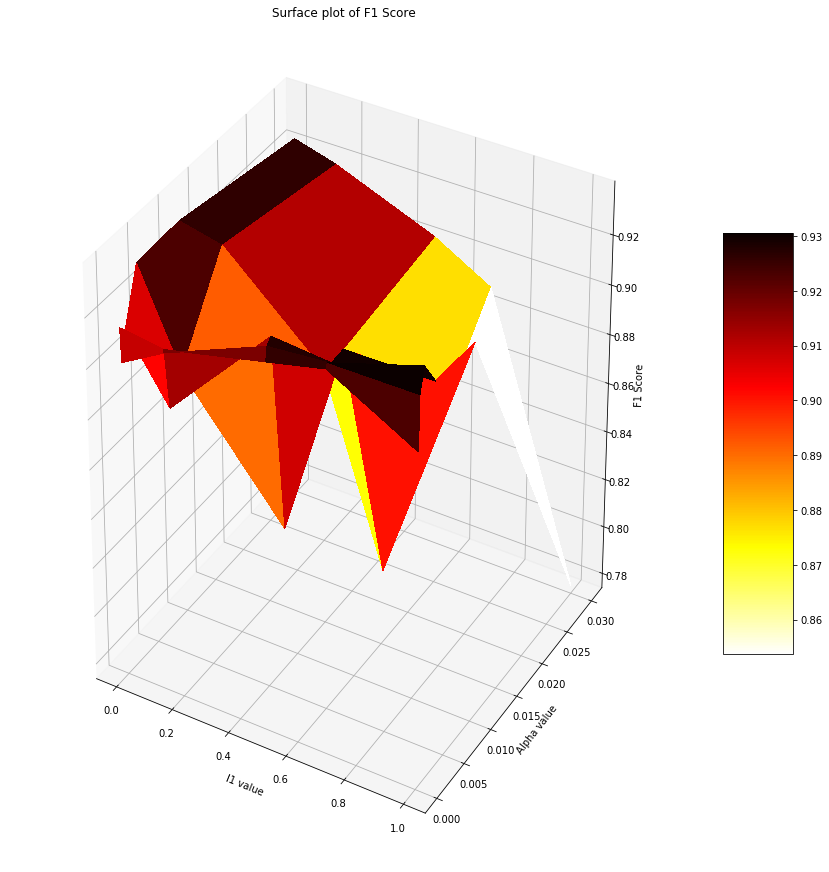

In [25]:
#plotting f1 score surface plot

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

X=l1
Y=Alpha

X,Y=np.meshgrid(X,Y)
Z=np.array(Enet_f1)
Z=Z.reshape(6,5)


ax.set_xlabel('l1 value')
ax.set_ylabel('Alpha value')
ax.set_zlabel('F1 Score')
fig.tight_layout()

plt.title('Surface plot of F1 Score')

surface_plot=ax.plot_surface(X,Y,Z, cmap=cm.hot_r,linewidth=0,antialiased=False)
fig.colorbar(surface_plot, shrink=0.5, aspect=6)
plt.show()

In [16]:
#Retraining the model with best alpha lambda value & predicting test set labels

from sklearn.metrics import classification_report, confusion_matrix
Enet= SGDClassifier(loss='log', penalty='elasticnet', alpha=0.001, l1_ratio=0.5)
Enet.fit(X_train,y_train.ravel())
y_predict = Enet.predict(X_test)


print("Confusion Matrix of Multiclass Regression:\n{}".format(confusion_matrix(y_test,y_predict)))
print("Classification Report of Multiclass Regression:\n{}".format(classification_report(y_test,y_predict)))

Enet_acc= accuracy_score(y_test,y_predict)
print("Accuracy Score for Multiclass Regression model:{}".format(Enet_acc))

Confusion Matrix of Multiclass Regression:
[[487   5   3   1   0   0]
 [ 31 421  14   5   0   0]
 [  5  11 403   0   1   0]
 [  0   3   0 448  40   0]
 [  1   0   0  40 491   0]
 [  0   0   0   0   0 537]]
Classification Report of Multiclass Regression:
              precision    recall  f1-score   support

           1       0.93      0.98      0.95       496
           2       0.96      0.89      0.92       471
           3       0.96      0.96      0.96       420
           4       0.91      0.91      0.91       491
           5       0.92      0.92      0.92       532
           6       1.00      1.00      1.00       537

   micro avg       0.95      0.95      0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947

Accuracy Score for Multiclass Regression model:0.9457074991516796


Confusion Matrix reveals there is no case of missclassification for action "LAYING" where maximum instances of missclassification happened for action "WALKING UPSTAIRS". Wighted Avearge F1 score is very good (95%) where within the classes, F1 score for all 6 classe are beyond 90% with high level of precision & recall. Finally, the overall Accuracy score for this model is 94.57%

# Part 4: Support Vector Machine (RBF Kernal)

In [83]:
##To know the performance measurement to be used for this part based on Student ID
#Based on the output, using "precision" for selecting best hyperparameters 
fID=218631099%2
print(fID)

1


In [28]:
from sklearn import svm
from sklearn import metrics

In [29]:
SVM_Precision=[]

In [30]:
gamma_value=[1e-3,1e-4]

C_value=[1,10,100,1000]

SVM_gamma=[]
SVM_C=[]
SVM_average_precision=[]

In [31]:
#performing 10 fold CV

for l in gamma_value:
    for i in C_value:
        SVM= svm.SVC(kernel='rbf', gamma=l, C=i)
        Precision_SVM = cross_val_score(SVM, X_train, y_train.ravel(), cv=10, scoring='precision_weighted', n_jobs=-1)
        SVM_average_precision=Precision_SVM.mean()
        SVM_Precision.append(SVM_average_precision)
        SVM_C = np.append(SVM_C,i)
        SVM_gamma= np.append(SVM_gamma,l) 

In [32]:
#best value of gamma & C
max_precision  = np.argmax(SVM_Precision)

Best_gamma = SVM_gamma[max_precision]
Best_C= SVM_C[max_precision]

print("Best gamma value: {}".format(Best_gamma))
print("Best C value:{}".format(Best_C))

Best gamma value: 0.001
Best C value:1000.0


In [74]:
#f1 score

SVM_f1=[]
SVM_f1_average=[]

SVM1_gamma=[]
SVM1_C=[]


In [75]:
for l in gamma_value:
    for i in C_value:
        SVM1= svm.SVC(kernel='rbf', gamma=l, C=i)
        f1_SVM = cross_val_score(SVM1, X_train, y_train.ravel(), cv=10, scoring='f1_weighted', n_jobs=-1)
        SVM_f1_average=f1_SVM.mean()
        SVM_f1.append(SVM_f1_average)
        SVM1_C = np.append(SVM1_C,i)
        SVM1_gamma= np.append(SVM1_gamma,l) 

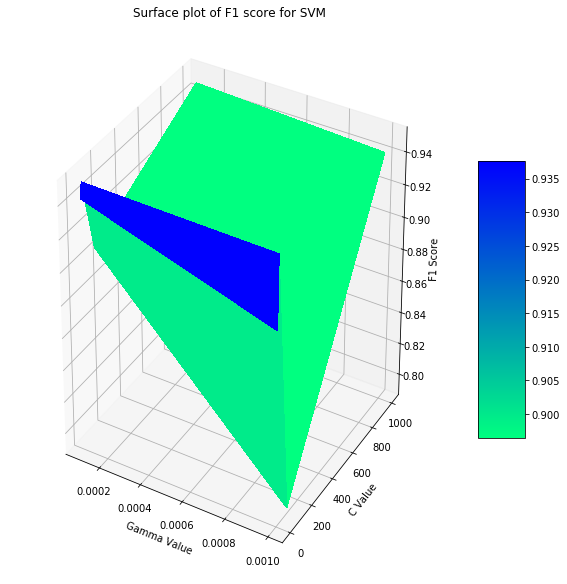

In [81]:
#plotting surface plot of F1 score

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

X=gamma_value
Y=C_value

X,Y=np.meshgrid(X,Y)
Z=np.array(SVM_f1)
Z=Z.reshape(4,2)

ax.set_xlabel('Gamma Value')
ax.set_ylabel('C Value')
ax.set_zlabel('F1 Score')
fig.tight_layout()

plt.title('Surface plot of F1 score for SVM')

surface_plot=ax.plot_surface(X,Y,Z, cmap=cm.winter_r,linewidth=0,antialiased=False)
fig.colorbar(surface_plot, shrink=0.5, aspect=6)
plt.show()

In the surface plot, gamma value is plotted on X axis where cost C is plotted on Y axis. The F1 score plotted on the Z axis. The surface plot reveals that F1 score are going higher in respone to increasing level of cost C. This indicates that with high cost C value we have lower cases of misclassification  

In [82]:
#Retraining the model with best alpha lambda value & predicting test set labels

SVM_Model= svm.SVC(kernel='rbf', gamma=Best_gamma, C=Best_C)
SVM_Model.fit(X_train,y_train.ravel())
y_predicted = SVM_Model.predict(X_test)


confusion_matrix_SVM= confusion_matrix(y_test,y_predicted)
print("SVM Confusion Matrix:\n{}".format(confusion_matrix_SVM))

classification_report_SVM=classification_report(y_test,y_predicted)
print("SVM Classification Report:\n{}".format(classification_report_SVM))

Acc_SVM= accuracy_score(y_test,y_predicted)
print("SVM Accuracy Score:\n{}".format(Acc_SVM))

SVM Confusion Matrix:
[[493   0   3   0   0   0]
 [ 17 454   0   0   0   0]
 [  4  10 406   0   0   0]
 [  0   2   0 436  53   0]
 [  0   0   0  12 520   0]
 [  0   0   0   0   0 537]]
SVM Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.99      0.98       496
           2       0.97      0.96      0.97       471
           3       0.99      0.97      0.98       420
           4       0.97      0.89      0.93       491
           5       0.91      0.98      0.94       532
           6       1.00      1.00      1.00       537

   micro avg       0.97      0.97      0.97      2947
   macro avg       0.97      0.96      0.97      2947
weighted avg       0.97      0.97      0.97      2947

SVM Accuracy Score:
0.9657278588394977


Confusion Matrix reveals that very limited number of missclassification happened for almost all the classes indicating a better perdormance than KNN and Elastic net classifier. An impressive 97% of overall F1 score with overall 96.57% accuracy making the model a strong classifier. 

# Part 5: Random Forest

In [84]:
##To know the performance measurement to be used for this part based on Student ID
#Based on the output, using "precision" for selecting best hyperparameters 
fID=218631099%2
print(fID)

1


In [38]:
from sklearn.ensemble import RandomForestClassifier

Rfcl_precision=[]
Rfcl_precision_average=[]
tree_depth=[300,500,600]
tree_numbers=[200,500,700]

Rfcl_tree_depth=[]
Rfcl_tree_numbers=[]

In [88]:
#10 fold CV

for i in tree_depth:
    for l in tree_numbers:
        Rfcl= RandomForestClassifier(n_estimators=l, max_depth=i)
        precision_Rfcl = cross_val_score(Rfcl, X_train, y_train.ravel(), cv=10, scoring='precision_weighted',n_jobs=-1)
        Rfcl_precision_average= precision_Rfcl.mean()
        Rfcl_precision.append(Rfcl_precision_average)
        Rfcl_tree_depth=np.append(Rfcl_tree_depth,i)
        Rfcl_tree_numbers=np.append(Rfcl_tree_numbers,l)

In [89]:
#finding the best hyperparameter

Max_rfcl_precision  = np.argmax(Rfcl_precision)

Best_tree_depth_value = Rfcl_tree_depth[Max_rfcl_precision]
Best_tree_number= Rfcl_tree_numbers[Max_rfcl_precision]

print("Best Value for Tree depth: {}".format(Best_tree_depth_value))
print("Best Value for Tree numbers:{}".format(Best_tree_number))

Best Value for Tree depth: 500.0
Best Value for Tree numbers:700.0


In [36]:
#f1 score

Rfcl_f1=[]
Rfcl_f1_average=[]


Rfcl1_tree_depth=[]
Rfcl1_tree_numbers=[]


In [40]:
for i in tree_depth:
    for l in tree_numbers:
        Rfcl1= RandomForestClassifier(n_estimators=l, max_depth=i)
        f1_Rfcl = cross_val_score(Rfcl1, X_train, y_train.ravel(), cv=10, scoring='f1_weighted',n_jobs=-1)
        Rfcl_f1_average= f1_Rfcl.mean()
        Rfcl_f1.append(Rfcl_f1_average)
        Rfcl1_tree_depth=np.append(Rfcl_tree_depth,i)
        Rfcl1_tree_numbers=np.append(Rfcl_tree_numbers,l)

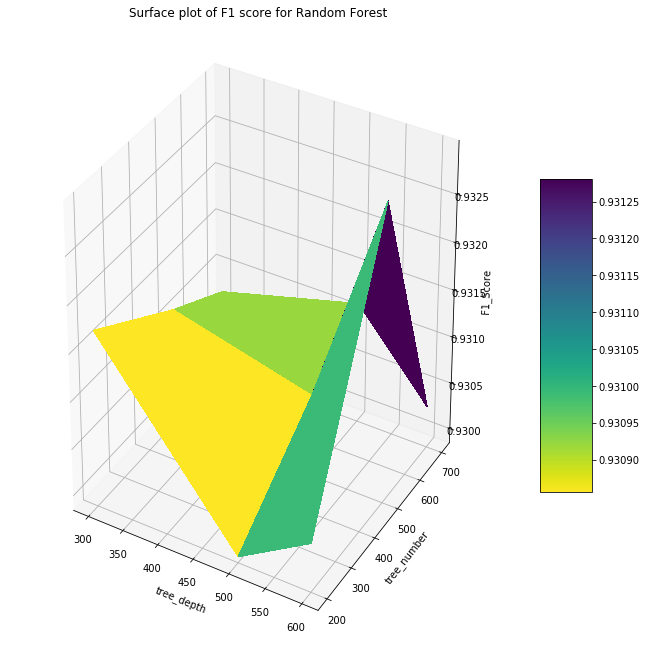

In [43]:
#plotting the surface plot of F1 score with respect to tree depth and tree numbers.

fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

X=tree_depth
Y=tree_numbers

X,Y=np.meshgrid(X,Y)
Z=np.array(Rfcl_f1)
Z=Z.reshape(3,3)

ax.set_xlabel('tree_depth')
ax.set_ylabel('tree_number')
ax.set_zlabel('F1_Score')
fig.tight_layout()

plt.title('Surface plot of F1 score for Random Forest')

surface_plot=ax.plot_surface(X,Y,Z, cmap=cm.viridis_r,linewidth=0,antialiased=False)
fig.colorbar(surface_plot, shrink=0.5, aspect=6)
plt.show()

In this surface plot, value of tree depth is plotted on X axis where tree number is plotted on Y axis. The F1 score plotted on the Z axis. The surface plot  indicating that in general with higher numbers of trees we get higher accuracy. The navy blueish hyperplane indicating the classification region with maximum F1 scores.  

In [93]:
#Retraining the model with best hyperparameters & predicting test set labels

Rfcl_Model= RandomForestClassifier(n_estimators=700, max_depth=500)
Rfcl_Model.fit(X_train,y_train)
y_predict_rfcl = Rfcl_Model.predict(X_test)


Rfcl_confusion_matrix= confusion_matrix(y_test,y_predict_rfcl)
print("Random Forest Confusion Matrix :\n{}".format(Rfcl_confusion_matrix))

Rfcl_classification_report=classification_report(y_test,y_predict_rfcl)
print("Random Forest Classification Report:\n{}".format(Rfcl_classification_report))

Rfcl_acc= accuracy_score(y_test,y_predict_rfcl)
print("Random Forest Accuracy Score :\n{}".format(Rfcl_acc))



Random Forest Confusion Matrix :
[[479   8   9   0   0   0]
 [ 35 429   7   0   0   0]
 [ 21  43 356   0   0   0]
 [  0   0   0 438  53   0]
 [  0   0   0  39 493   0]
 [  0   0   0   0   0 537]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.97      0.93       496
           2       0.89      0.91      0.90       471
           3       0.96      0.85      0.90       420
           4       0.92      0.89      0.90       491
           5       0.90      0.93      0.91       532
           6       1.00      1.00      1.00       537

   micro avg       0.93      0.93      0.93      2947
   macro avg       0.93      0.92      0.93      2947
weighted avg       0.93      0.93      0.93      2947

Random Forest Accuracy Score :
0.9270444519850696


The overall accuracy of random forest is not much high if compared to SVM and multiclass logistic regression performance.Recall rate of some of the classes such as "Walking Downstair" is quite poor.  

# Part 6: Discussion

1. Write a brief discussion about which classification method achieved the best performance and your thoughts on the reason behind this

In our machine learning project we received highest overall accuracy of 96.57% for SVM model with RBF kernel followed by Multiclass Logistic Regression with overall accuracy of 94.57%. It also had an impressive 97% of F1 score followed by 95% F1 score by multiclass logistic regresssion. 

We have seen that the dataset was high dimensionla and as we know that SVM models works relatively better for high dimensional data. With appropriate Kernal tricks it can handle the issue of outlier effieciently and therefore low level of misclassification happens. Additionally as we used non linear kernal like RBF it enabled the model to avoid the mistakes of linear classification. Specifically, in our model we used the best hyperparameter, cost C=1000, which is a high value indicationg it prioritizes making few mistakes in classifucation. These could be the core reason for achieving better result with this model. 



2. Which method performed the worst and why?

Not surprisingly KNN classification has provided the lowest accuracy(90.66%) and lowest F1 score(91%) among all. We know that KNN is not a good fit for large set of data and high dimensional data. That is because then the algorithm of this model finds it diffcult to effectively calculate the distances between the data points/ each dimensions. It also provides poor performance for non normalized data. However, that was not any issue here since here both training and testing data was normalized at source. Thus high dimension and the volume of this particular dataset has made this model comparativey ineffective in this project.   


3. Do you have any suggestions to further improve model performances?

We have achieved a similar kind of result  with the paper's findings by applying a different kernal like RBF for SVM model. 

However, we could experiment with our hyperparameters to understand the impact over the training data as here we only used 2 gamma values and 4 cost- C values in figuring out the best hyperparameters. Maybe we could experiment with few other combinations as well to find out best hyperparameters although that might become a time intensive effort.

Here, though there was not any case of class imbalance in training and testing data, however for suh dataset, instead of doing random splitting on training and testing data we could do stratefied random split as a best practice.  

Finally, we could also test some other algorithms based on non linear deep learning techniques to explore further. 